# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [16]:
import requests #used for making http requests 
from bs4 import BeautifulSoup #used for webscraping : parsing html content 
import pandas as pd

In [38]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #number of pages you want to scrape
page_size = 100 #number of reviews to review per page 

reviews = [] #store scraped reviews


for i in range(1, pages + 1):

    print(f"Scraping page {i}") 

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    #This line constructs the URL for each page by appending the page number and the desired page size as query parameters.

    # Collect HTML data from this page
    response = requests.get(url) 
    #This sends an HTTP GET request to the URL and stores the response in the response variable.
   
    #if response.status_code == 200: ensure that the request is successful
    # Parse content
    content = response.content
    
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
       
        reviews.append(para.get_text())
    
    #This loop finds all HTML elements with the specified class "text_content" and extracts the text from those elements. It appends the text to the reviews list.
   
        
        

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


In [39]:
print(reviews[0])

✅ Trip Verified |   They downgraded me from business to premium economy. They took three months to get back to me and offered me 200 pounds or 400 AUD. The difference between business class and premium economy (which I never fly) is $3000 AUD and the difference between economy and business is $6500 AUD. They owe me at least 1500 pounds and to be very fair 3250 pounds. The downgrade was insulting and incredibly painful as I had a recent cancer operation and have a back injury which I have pointed out to them - I need to lie down. The wait for them to get around to me has been numbing. The insult of their offer has been the slap in the face to continue my degradation. The people I have dealt with at the airport have been down to earth, honest hard working people. The actual staff on the plane were warm and friendly - and helpful. The systems under which BA operates are some sort of medieval torture.


In [111]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | They downgraded me from bu...
1,✅ Trip Verified | The already delayed aircra...
2,✅ Trip Verified | Caught up in the Gatwick c...
3,✅ Trip Verified | BA has a real problem with...
4,✅ Trip Verified | Our connecting flight from L...


In [112]:
df.to_csv("BA_reviews.csv")

In [143]:
df1=pd.read_csv("BA_reviews.csv")
df1.reset_index(inplace=True,drop=True)

In [144]:
df1["reviews"]

0      ✅ Trip Verified |   They downgraded me from bu...
1      ✅ Trip Verified |   The already delayed aircra...
2      ✅ Trip Verified |   Caught up in the Gatwick c...
3      ✅ Trip Verified |   BA has a real problem with...
4      ✅ Trip Verified | Our connecting flight from L...
                             ...                        
995    ✅ Trip Verified |  Moscow to London. Fantastic...
996    ✅ Trip Verified |  Johannesburg to London . Fo...
997    ✅ Trip Verified |  Bridgetown to Gatwick. Book...
998    ✅ Trip Verified |  Glasgow to New York via Lon...
999    ✅ Trip Verified |  Sydney to London via Singap...
Name: reviews, Length: 1000, dtype: object

In [145]:
df1.info()
df1.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0,reviews
count,1000.000000,1000
unique,NaN,1000
top,NaN,✅ Trip Verified | They downgraded me from bu...
freq,NaN,1
mean,499.500000,NaN
std,288.819436,NaN
min,0.000000,NaN
25%,249.750000,NaN
50%,499.500000,NaN
75%,749.250000,NaN


no missing values detected 

## Data cleaning

In [146]:
df1

,Unnamed: 0,reviews
0,0,✅ Trip Verified | They downgraded me from bu...
1,1,✅ Trip Verified | The already delayed aircra...
2,2,✅ Trip Verified | Caught up in the Gatwick c...
3,3,✅ Trip Verified | BA has a real problem with...
4,4,✅ Trip Verified | Our connecting flight from L...
...,...,...
995,995,✅ Trip Verified | Moscow to London. Fantastic...
996,996,✅ Trip Verified | Johannesburg to London . Fo...
997,997,✅ Trip Verified | Bridgetown to Gatwick. Book...
998,998,✅ Trip Verified | Glasgow to New York via Lon...


In [147]:
df.iloc[1].reviews


'✅ Trip Verified |   The already delayed aircraft landed and apart from the small BA logo on the rear of the fuselage, there was no indication as to whom the carrier really was. Boarding turned into a farce with passenger groups being told to wait in one queue in order to board, only to be informed we were on the wrong place and our boarding wasn\'t allowed yet. The interior cabin was reminiscent of a BA cabin from twenty years earlier except the tight legroom and uncomfortable seating which made a budget airline feel luxurious. The crew were not BA but from an unknown charter company. Service was slow, and as usual, choices of food to purchase ran out before they\'d reached row 24. I requested a cup of tea which never appeared. Thank goodness for my airport purchased water and the tiny offering of pretzels. The over officious senior flight attendant, who\'d been facilitating in \'Club Europe\' appeared in economy and immediately slammed down the armrests (whilst still in mid flight) m

In [148]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()



     Unnamed: 0                                            reviews
0             0  hey downgraded me from business to premium eco...
1             1  he already delayed aircraft landed and apart f...
2             2     caught up in the gatwick cancellation fiasc...
3             3     ba has a real problem with boarding it's fl...
4             4  our connecting flight from london to glasgow w...
..          ...                                                ...
995         995  moscow to london. fantastic first class servic...
996         996  johannesburg to london . for supper i asked fo...
997         997  bridgetown to gatwick. booked our return fligh...
998         998  glasgow to new york via london. morning flight...
999         999  sydney to london via singapore. i'm hugely dis...

[1000 rows x 2 columns]


In [149]:
df1

,Unnamed: 0,reviews
0,0,hey downgraded me from business to premium eco...
1,1,he already delayed aircraft landed and apart f...
2,2,caught up in the gatwick cancellation fiasc...
3,3,ba has a real problem with boarding it's fl...
4,4,our connecting flight from london to glasgow w...
...,...,...
995,995,moscow to london. fantastic first class servic...
996,996,johannesburg to london . for supper i asked fo...
997,997,bridgetown to gatwick. booked our return fligh...
998,998,glasgow to new york via london. morning flight...


,Unnamed: 0,reviews
0,0,Trip Verified | They downgraded me from busi...
1,1,Trip Verified | The already delayed aircraft...
2,2,Trip Verified | Caught up in the Gatwick can...
3,3,Trip Verified | BA has a real problem with b...
4,4,Trip Verified | Our connecting flight from Lon...
...,...,...
995,995,Trip Verified | Moscow to London. Fantastic f...
996,996,Trip Verified | Johannesburg to London . For ...
997,997,Trip Verified | Bridgetown to Gatwick. Booked...
998,998,Trip Verified | Glasgow to New York via Londo...


## Sentiment analysis using NLTK library

In [150]:
#remove punctuation
df1["reviews"]=df1["reviews"].str.replace('[^\w\s]','') # w : word, s: space


/var/folders/_9/j5zgrv5d4kz42c0s78nxpclh0000gn/T/ipykernel_1814/2066244500.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1["reviews"]=df1["reviews"].str.replace('[^\w\s]','') # w : word, s: space


In [157]:
df1.iloc[1].reviews

'he already delayed aircraft landed and apart from the small ba logo on the rear of the fuselage there was no indication as to whom the carrier really was boarding turned into a farce with passenger groups being told to wait in one queue in order to board only to be informed we were on the wrong place and our boarding wasnt allowed yet the interior cabin was reminiscent of a ba cabin from twenty years earlier except the tight legroom and uncomfortable seating which made a budget airline feel luxurious the crew were not ba but from an unknown charter company service was slow and as usual choices of food to purchase ran out before theyd reached row 24 i requested a cup of tea which never appeared thank goodness for my airport purchased water and the tiny offering of pretzels the over officious senior flight attendant whod been facilitating in club europe appeared in economy and immediately slammed down the armrests whilst still in mid flight making an already uncomfortable journey feel w

In [159]:
import nltk
#tokenize
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)

In [160]:
df1

,Unnamed: 0,reviews
0,0,"[hey, downgraded, me, from, business, to, prem..."
1,1,"[he, already, delayed, aircraft, landed, and, ..."
2,2,"[caught, up, in, the, gatwick, cancellation, f..."
3,3,"[ba, has, a, real, problem, with, boarding, it..."
4,4,"[our, connecting, flight, from, london, to, gl..."
...,...,...
995,995,"[moscow, to, london, fantastic, first, class, ..."
996,996,"[johannesburg, to, london, for, supper, i, ask..."
997,997,"[bridgetown, to, gatwick, booked, our, return,..."
998,998,"[glasgow, to, new, york, via, london, morning,..."


In [165]:
#delete stop words 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

In [166]:
df1

,Unnamed: 0,reviews
0,0,hey downgraded business premium economy took t...
1,1,already delayed aircraft landed apart small ba...
2,2,caught gatwick cancellation fiasco point smoot...
3,3,ba real problem boarding flights get first fil...
4,4,connecting flight london glasgow canceled forc...
...,...,...
995,995,moscow london fantastic first class service mo...
996,996,johannesburg london supper asked warm hot wate...
997,997,bridgetown gatwick booked return flight busine...
998,998,glasgow new york via london morning flight gla...


In [176]:
from textblob import TextBlob
#calculating polarity 
def polarity_indic(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

def tag_calcul(num):
    if num<0 :
        return "negative"
    
    elif num>0 :
        return "positive"
    
    else :
        return "neutral"

In [177]:
df1["polarity"]=df1["reviews"].apply(polarity_indic)
df1["tag"]=df1["polarity"].apply(tag_calcul)

In [178]:
df1

,Unnamed: 0,reviews,polarity,tag
0,0,hey downgraded business premium economy took t...,-0.029762,negative
1,1,already delayed aircraft landed apart small ba...,-0.121032,negative
2,2,caught gatwick cancellation fiasco point smoot...,-0.098611,negative
3,3,ba real problem boarding flights get first fil...,-0.066667,negative
4,4,connecting flight london glasgow canceled forc...,-0.112727,negative
...,...,...,...,...
995,995,moscow london fantastic first class service mo...,0.344955,positive
996,996,johannesburg london supper asked warm hot wate...,0.283333,positive
997,997,bridgetown gatwick booked return flight busine...,-0.316667,negative
998,998,glasgow new york via london morning flight gla...,0.284366,positive


## Analyse 

<AxesSubplot:title={'center':'Percentage of reviews per type'}, xlabel=' review category', ylabel='percentage'>

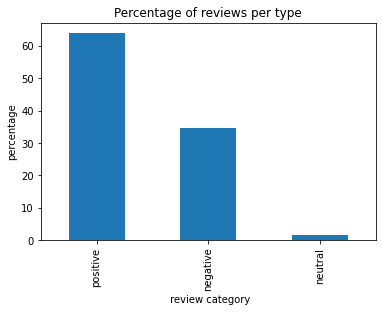

In [200]:
(df1.tag.value_counts()/10).plot(kind="bar",title="Percentage of reviews per type",ylabel="percentage",xlabel=" review category")

In [201]:
from wordcloud import WordCloud
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.